# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

# Data validation overview:

The dataset contains 947 rows and 8 columns before cleaning and validation.
Each of the columns of the dataset was inspected against the table given in the data information to see if it's integrity matched. 
## Data integrity:
- recipe : numeric, is identifying the recipe. From 1 to 947. Compliant to the data information. 
- recipe : numeric, representing the amount of calories in the dish. Compliant to the data information. 
- carbohydrate : numeric, representing the amount of carbohydrates in grams in the dish. Compliant to the data information. 
- sugar : numeric, representing ht amount of sugar in grams in the dish. Compliant to the data information. 
- category : character, recipes were listed in 11 categories instead of the 10 announced in the data information. The additional category was "Chicken Breast". Elements of said category were relabled as "Chicken" to match the amount of categories given in the data information. Is character and contains the correct 10 different possible groupings after cleaning.
- servings : character, is supposed to be a numerical data. The problem comes from some of the labels being "x as a snack" with x representing the amount of servings. The column was translated to the x, and the "as a snack" was removed, and then cast to integer to match the data information. 
- high_traffic : character, labeled as "High" if the recipe induced a high traffic. This column presents 373 missing values, or over 39% of the total entries. Those missing values were interpreted as a binary way of labeling the data, no label being given when the recipe did not induce a high traffic. The missing values were therefore replaced with a label that translates that: "Low".

## Missing values:
There were 52 rows presenting missing values in all four of the same columns (calories, carbohydrate, sugar, protein). Those missing values represent a little over 5% of the original data, I decided to remove those rows from the dataset to avoid introducing error in the predictions. 

## Additional cleaning

Both category and high_traffic columns were then transformed to category datatype to help with the preprocessing of the dataset. 

After the validation the dataset contains 895 rows and 8 columns, with no missing data.


In [2]:
# Importing useful packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Importing the data 
df = pd.read_csv('recipe_site_traffic_2212.csv')
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


## Data Validation step by step

We can already see that there are some missing values in the dataframe. We are going to explore each column to see if the data is conform to the Data Information table that the company gave us. 
We will first deal with the missing values, then clean the data according to the data information given.

In [3]:
#Data Validation
print(df.isna().sum())
print("Shape of the dataframe :", df.shape, "\n") 
print("Data types :", df.dtypes) 
print("Different values in high_traffic :", df.high_traffic.unique())
percentage_null_traffic = df.high_traffic.isna().sum()/len(df.high_traffic)*100
print(f"Percentage of null values in high_traffic: {round(percentage_null_traffic,2)}%")


recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64
Shape of the dataframe : (947, 8) 

Data types : recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic     object
dtype: object
Different values in high_traffic : ['High' nan]
Percentage of null values in high_traffic: 39.39%


In this project, we are trying to predict which recipes generate a high traffic. Therefore, our target valuable is high_traffic in our dataset. Since there is only one value possible for it: "High", we can deduce that since the recipes are labeled from 1 to 947, the recipe was labeled as high_traffic only if it genereated a high traffic. We can also see that there is a consequent amount of null values in the high_traffic column. 

We can assume that it means that the null values where to a not so high traffic, which we can extrapolate to a low traffic.
We will therefore translate those values to Low. 

In [4]:
#Creating a new dataframe clean_df
clean_df = df
clean_df['high_traffic'] = clean_df['high_traffic'].fillna('Low') #Replacing the null values with Low in high_traffic
clean_df['high_traffic'] #Making sure it worked

#Visualizing the last missing values
missing_values_df = clean_df[clean_df.isna().any(axis=1)] #Checking rows for which we have missing values
missing_values_df #Checking that the missing values are located in the same rows
proportion_missing = missing_values_df.shape[0]/clean_df.shape[0]*100 #Estimating the proportion of missing values left
print(f"The proportion of missing values is: {round(proportion_missing,2)}%")
clean_df = clean_df.dropna()
clean_df.shape #895 rows, so we have indeed removed the 5.49% of missing values
clean_df.isna().sum() #No more missing values in the dataset

The proportion of missing values is: 5.49%


recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

I noticed that the amount of missing values were the same for the columns calories, carbohydrate, sugar and protein. The conjecture was that the missing values were located in the same for the 52 rows. 
After confirming that it was the case, since they only represent about 5% of the data, we can drop these rows from the dataframe and keep enough information to train our model. 

In [5]:
#The column serving is not the right datatype, it should be numeric
print(clean_df.servings.unique()) # We notice two descriptions added to our normally numeric data
clean_df.servings = clean_df.servings.str.strip(' as a snack') #Removing the excess in the data
print(clean_df.servings.unique()) #Checking the efficiency of the removal
clean_df.servings = clean_df.servings.astype(int) #Converting the data to match the data information
clean_df.servings.dtype #Checking that our data is now an int

['4' '1' '2' '6' '4 as a snack' '6 as a snack']
['4' '1' '2' '6']


dtype('int64')

In [6]:
#Checking the different categories available in categories and whether there are duplicates
print("Diffrent categories on the raw dataset: ",clean_df.category.unique()) #Chicken Breast is supposed to be in the Chicken group

clean_df.category = clean_df.category.str.replace('Chicken Breast', 'Chicken') 
#Putting Chicken Breast in the Chicken category
diff_categories = pd.Series(clean_df.category.unique()).to_list() #Creating a list of the different categories available to compare them with the data information
print(f"Different categories after cleaning: {diff_categories}\nThere is {len(diff_categories)} groups after data cleaning.") #We now have the correct groups

#Converting category and high_traffic to categorical data
clean_df[['category','high_traffic']] = clean_df[['category','high_traffic']].astype('category')
clean_df[['category','high_traffic']].dtypes #The columns were properly converted

Diffrent categories on the raw dataset:  ['Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Pork' 'Chicken' 'Vegetable' 'Meat' 'Dessert']
Different categories after cleaning: ['Potato', 'Breakfast', 'Beverages', 'One Dish Meal', 'Chicken', 'Lunch/Snacks', 'Pork', 'Vegetable', 'Meat', 'Dessert']
There is 10 groups after data cleaning.


category        category
high_traffic    category
dtype: object

## Preprocessing
In order for the model to be trainable with our data, we need to convert the categorical data to numeric values using pd.get_dummies. This preprocessing will also be usefull to make a correlation matrix.

In [7]:
#Preprocessing of the dataframe
processed_df = pd.get_dummies(clean_df, columns = ['category'])
processed_df = pd.get_dummies(processed_df, columns = ['high_traffic'], prefix='')
processed_df['high_traffic'] = processed_df['_High']
processed_df = processed_df.drop(columns=['_High','_Low']) #Done to keep only a binary column with 1s for "High"

processed_df.head()

,recipe,calories,carbohydrate,sugar,protein,servings,category_Beverages,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,high_traffic
1,2,35.48,38.56,0.66,0.92,4,0,0,0,0,0,0,0,0,1,0,1
2,3,914.28,42.68,3.09,2.88,1,0,1,0,0,0,0,0,0,0,0,0
3,4,97.03,30.56,38.63,0.02,4,1,0,0,0,0,0,0,0,0,0,1
4,5,27.05,1.85,0.80,0.53,4,1,0,0,0,0,0,0,0,0,0,0
5,6,691.15,3.46,1.65,53.93,2,0,0,0,0,0,0,1,0,0,0,1


## Data visualization

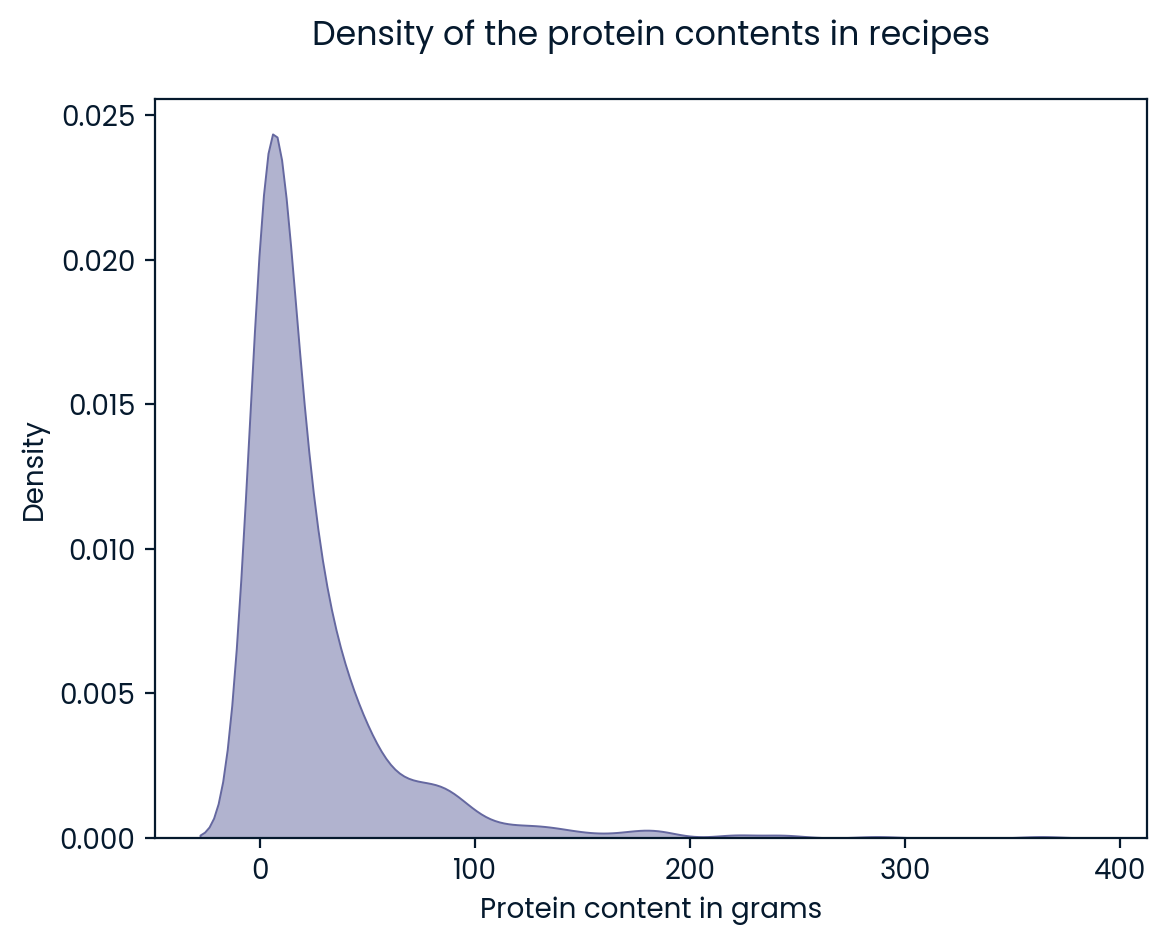

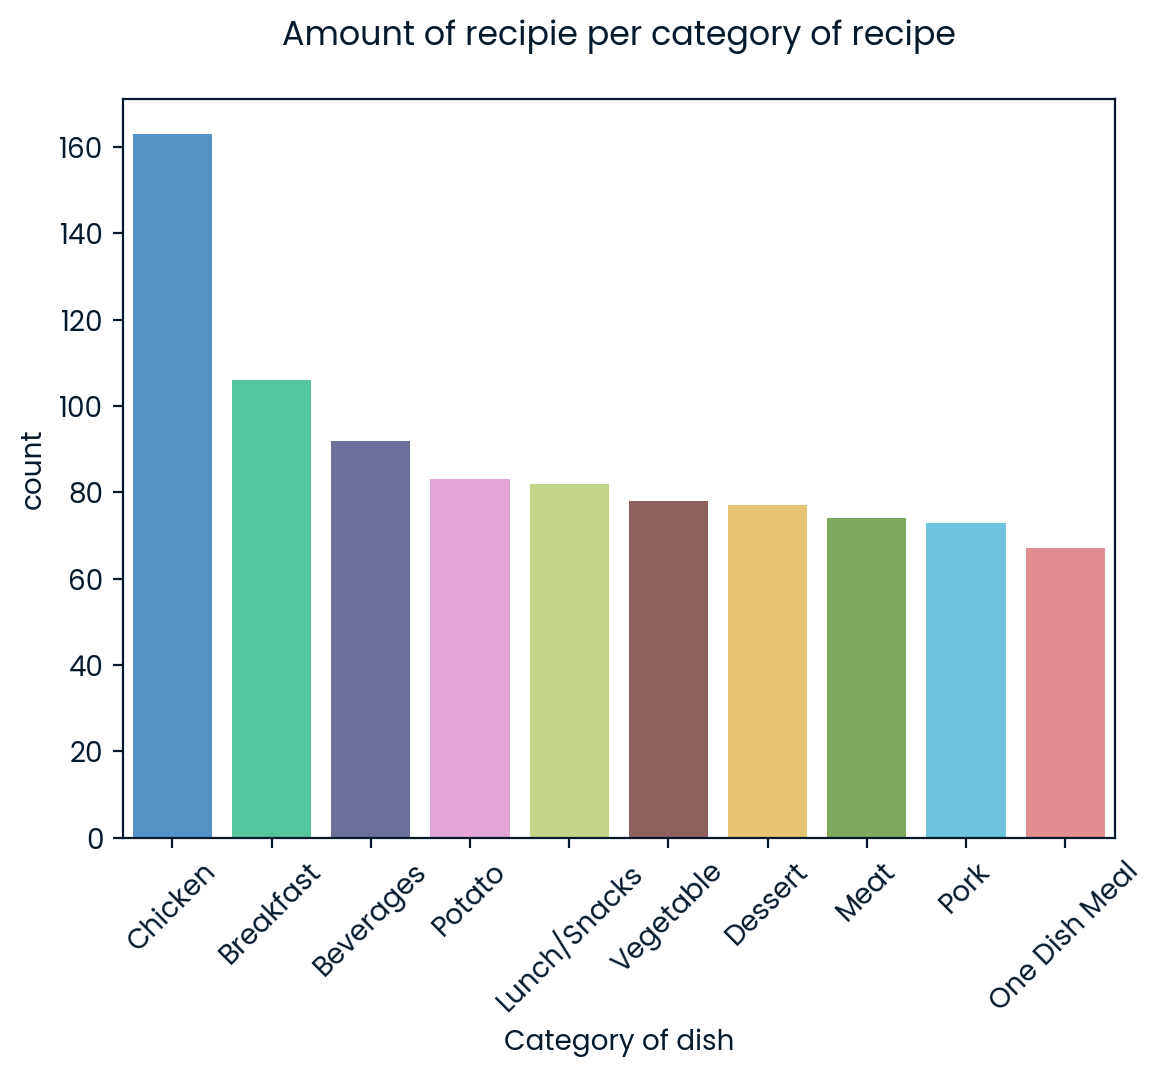

In [8]:
# Looking at the repartition of protein contents for the different recipes
sns.kdeplot(data = clean_df, x='protein', fill = True, palette = 'crest', alpha = 0.5, linewidth= 0.7)
plt.title("Density of the protein contents in recipes", y=1.05)
plt.xlabel("Protein content in grams")
plt.show()

#Seeing how many recipes there are per categories, and then ordering then in a descending manner
categories_ordered = clean_df.category.value_counts(ascending = False)
df_categories_ordered = pd.DataFrame({'category': categories_ordered.index, 'count': categories_ordered.values})

# Plot using the ordered categories
sns.barplot(x='category', y='count', data=df_categories_ordered, order=df_categories_ordered['category'], hue=df_categories_ordered['category'])
plt.xticks(rotation=45)
plt.title('Amount of recipie per category of recipe', y=1.05)
plt.xlabel('Category of dish')
plt.show()

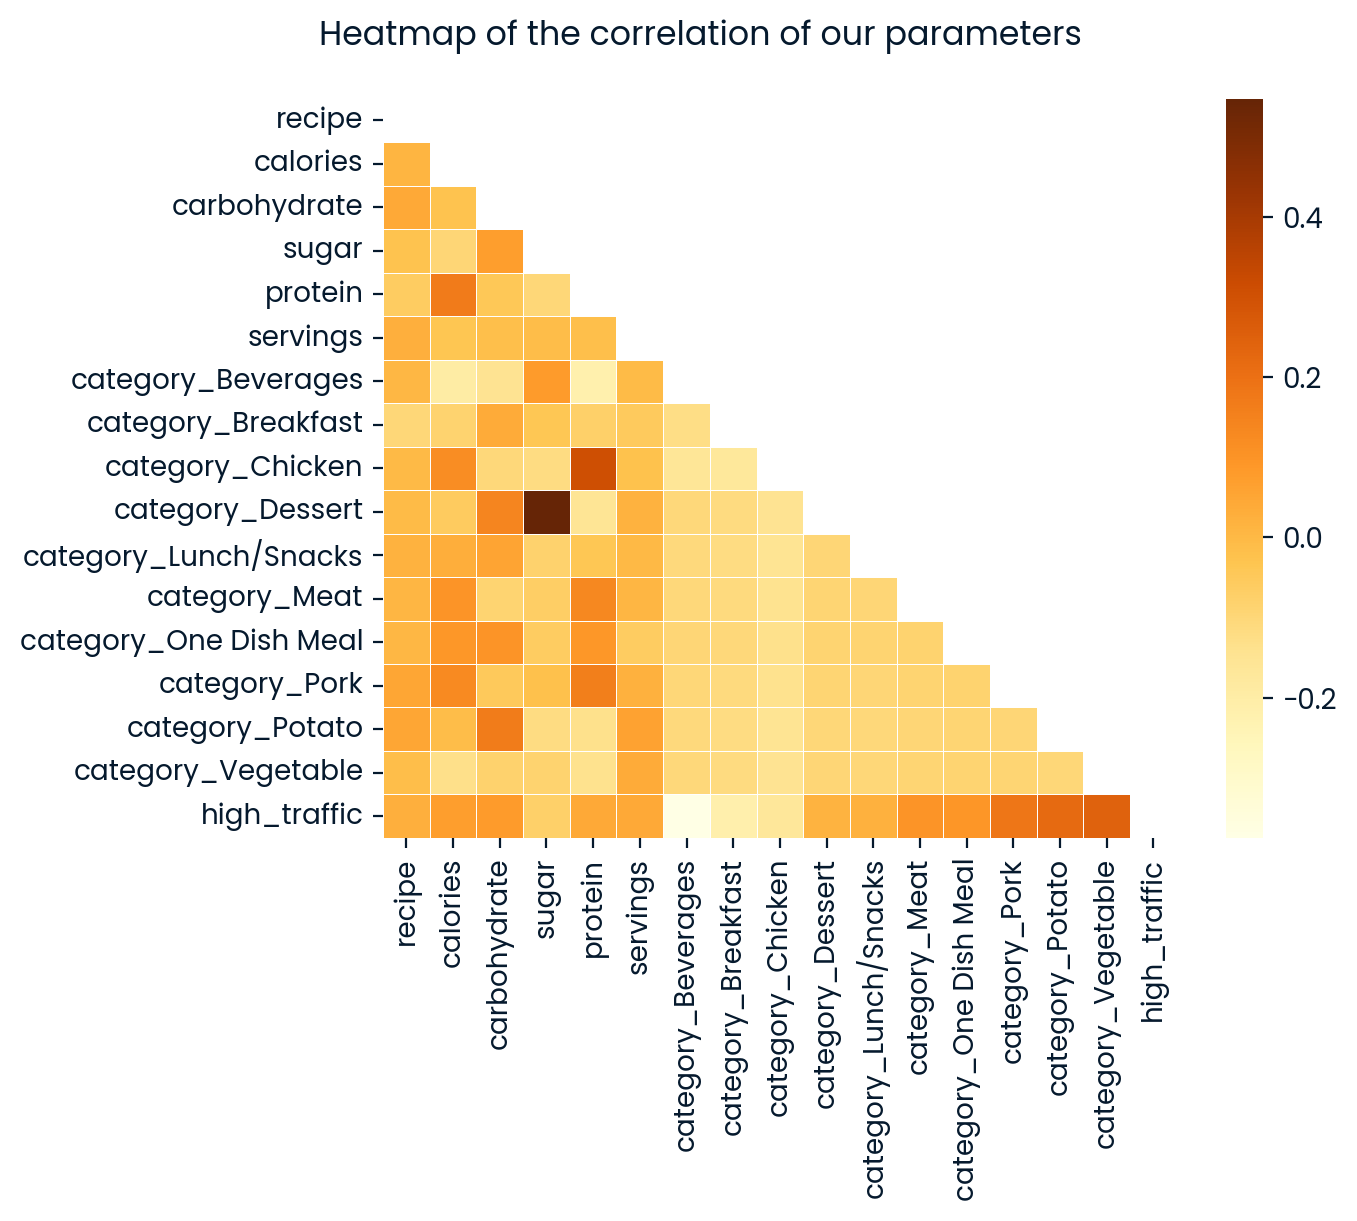

In [9]:
# Doing a correlation matrix of our data
correlation_df = processed_df.corr()
mask = np.triu(np.ones_like(correlation_df, dtype=bool)) #Creating a mask to only get the lower triangle diplayed
sns.heatmap(data = correlation_df, cmap='YlOrBr', mask=mask, annot=False, linewidths=0.3)
plt.title('Heatmap of the correlation of our parameters', x = 0.4, y=1.05)
plt.show()

## According our graphics, we can see three things:
- The recipes are majorily of low calories, sugar, carbohydrates and proteins. (Only the density for protein content is shown here). We can also notice from the distributions that there are a lot of outliers for these different columns.
- The recipes are fairly well distributed in the different categories, with the group having the most dishes being Chicken, and the group having the less amount of recipes being One dish meal.
- There doesn't seem to be any obvious correlation between our parameters (except from the fact that there is a moderate correlation between Dessert recipes and the sugar contents, and an weak inverse correlation between the traffic and Beverages recipes).

# Model developpment


## Type of problem

In this project, we are trying to predict when a recipe is going to lead to a high traffic on a website. Here we have a target variable, that we want our model to be able to predict. This target variable is the high_traffic column. 
So we are in a **supervised machine learning** problem, more specifically a **classification problem**. 

## Initializing our baseline model
We start here by splitting our data and trying to use a basic Decision tree classifier model on our data to set a baseline for our performance. 
Since we know there are a lot of outliers, I chose a model that is known to be robust to those. A Decision tree classifier also provides the advantages of being easy to understand for an audiance, have the ability to determine feature importance, as well as not need for the data to be scaled or normalize. This will make the model easier to use fo the client as well.

In [10]:
#Importing machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

#We scamble our dataset not to have the order influence the training of our model. 
#We also drop recipe, as it's not giving any valuable information other than the number of the recipe
scramble = processed_df.sample(frac=1, random_state=1).drop(columns='recipe')

X = scramble.drop(columns = 'high_traffic').values
y = scramble.high_traffic.values

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#Fitting a basic Decision Tree Classifier on our model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
report_dt = classification_report(y_test, y_pred_dt)
print("Classification report for the basic model:\n",report_dt)

Classification report for the basic model:
               precision    recall  f1-score   support

           0       0.59      0.58      0.58       109
           1       0.72      0.72      0.72       160

    accuracy                           0.67       269
   macro avg       0.65      0.65      0.65       269
weighted avg       0.66      0.67      0.66       269



## Fine tuning and improving our model using BaggingClassifier
By using a bagging classifier on our Decision tree classifier, we can improve it's overall accuracy by reducing overfitting of the data and variance by combining multiple trees. 

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold, RandomizedSearchCV

# Initializing our Bagging classifier to improve our Decision tree classifier
bc = BaggingClassifier(base_estimator=dt, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Defining parameters for the RandomizedSearchCV to try
bc_params = {'n_estimators':np.arange(300,500,50), 'n_jobs':np.arange(-5,5,1)}

#Refining the model by finding the best performing parameters using RandomSearch
bc_cv = RandomizedSearchCV(bc, bc_params, scoring = 'accuracy', cv=kf, random_state=42)
bc_cv.fit(X_train, y_train)

print(f'The best parameters for the model are {bc_cv.best_params_}\n')

#Setting the best model to a variable
best_bc = bc_cv.best_estimator_
#Predicting on our data
y_pred_bc = best_bc.predict(X_test) 
#Getting the full report on our model
report_best_model = classification_report(y_test, y_pred_bc)
print("Full report for the tuned model:\n", report_best_model)

The best parameters for the model are {'n_jobs': -1, 'n_estimators': 300}

Full report for the tuned model:
               precision    recall  f1-score   support

           0       0.74      0.67      0.70       109
           1       0.79      0.84      0.81       160

    accuracy                           0.77       269
   macro avg       0.76      0.75      0.76       269
weighted avg       0.77      0.77      0.77       269



## Comparing the results of our two models through visualisation
Here I decided to use an ROC curve for both models, to show the improvement in the sensitivity between the two models. I also displayed the confusion matrix for both models to further reinforce this notion.  

The sensitivity of the Baseline model is 72.50%, and the accuracy is 66.54%
The sensitivity of the Improved model is 83.75%, and the accuracy is 76.95%


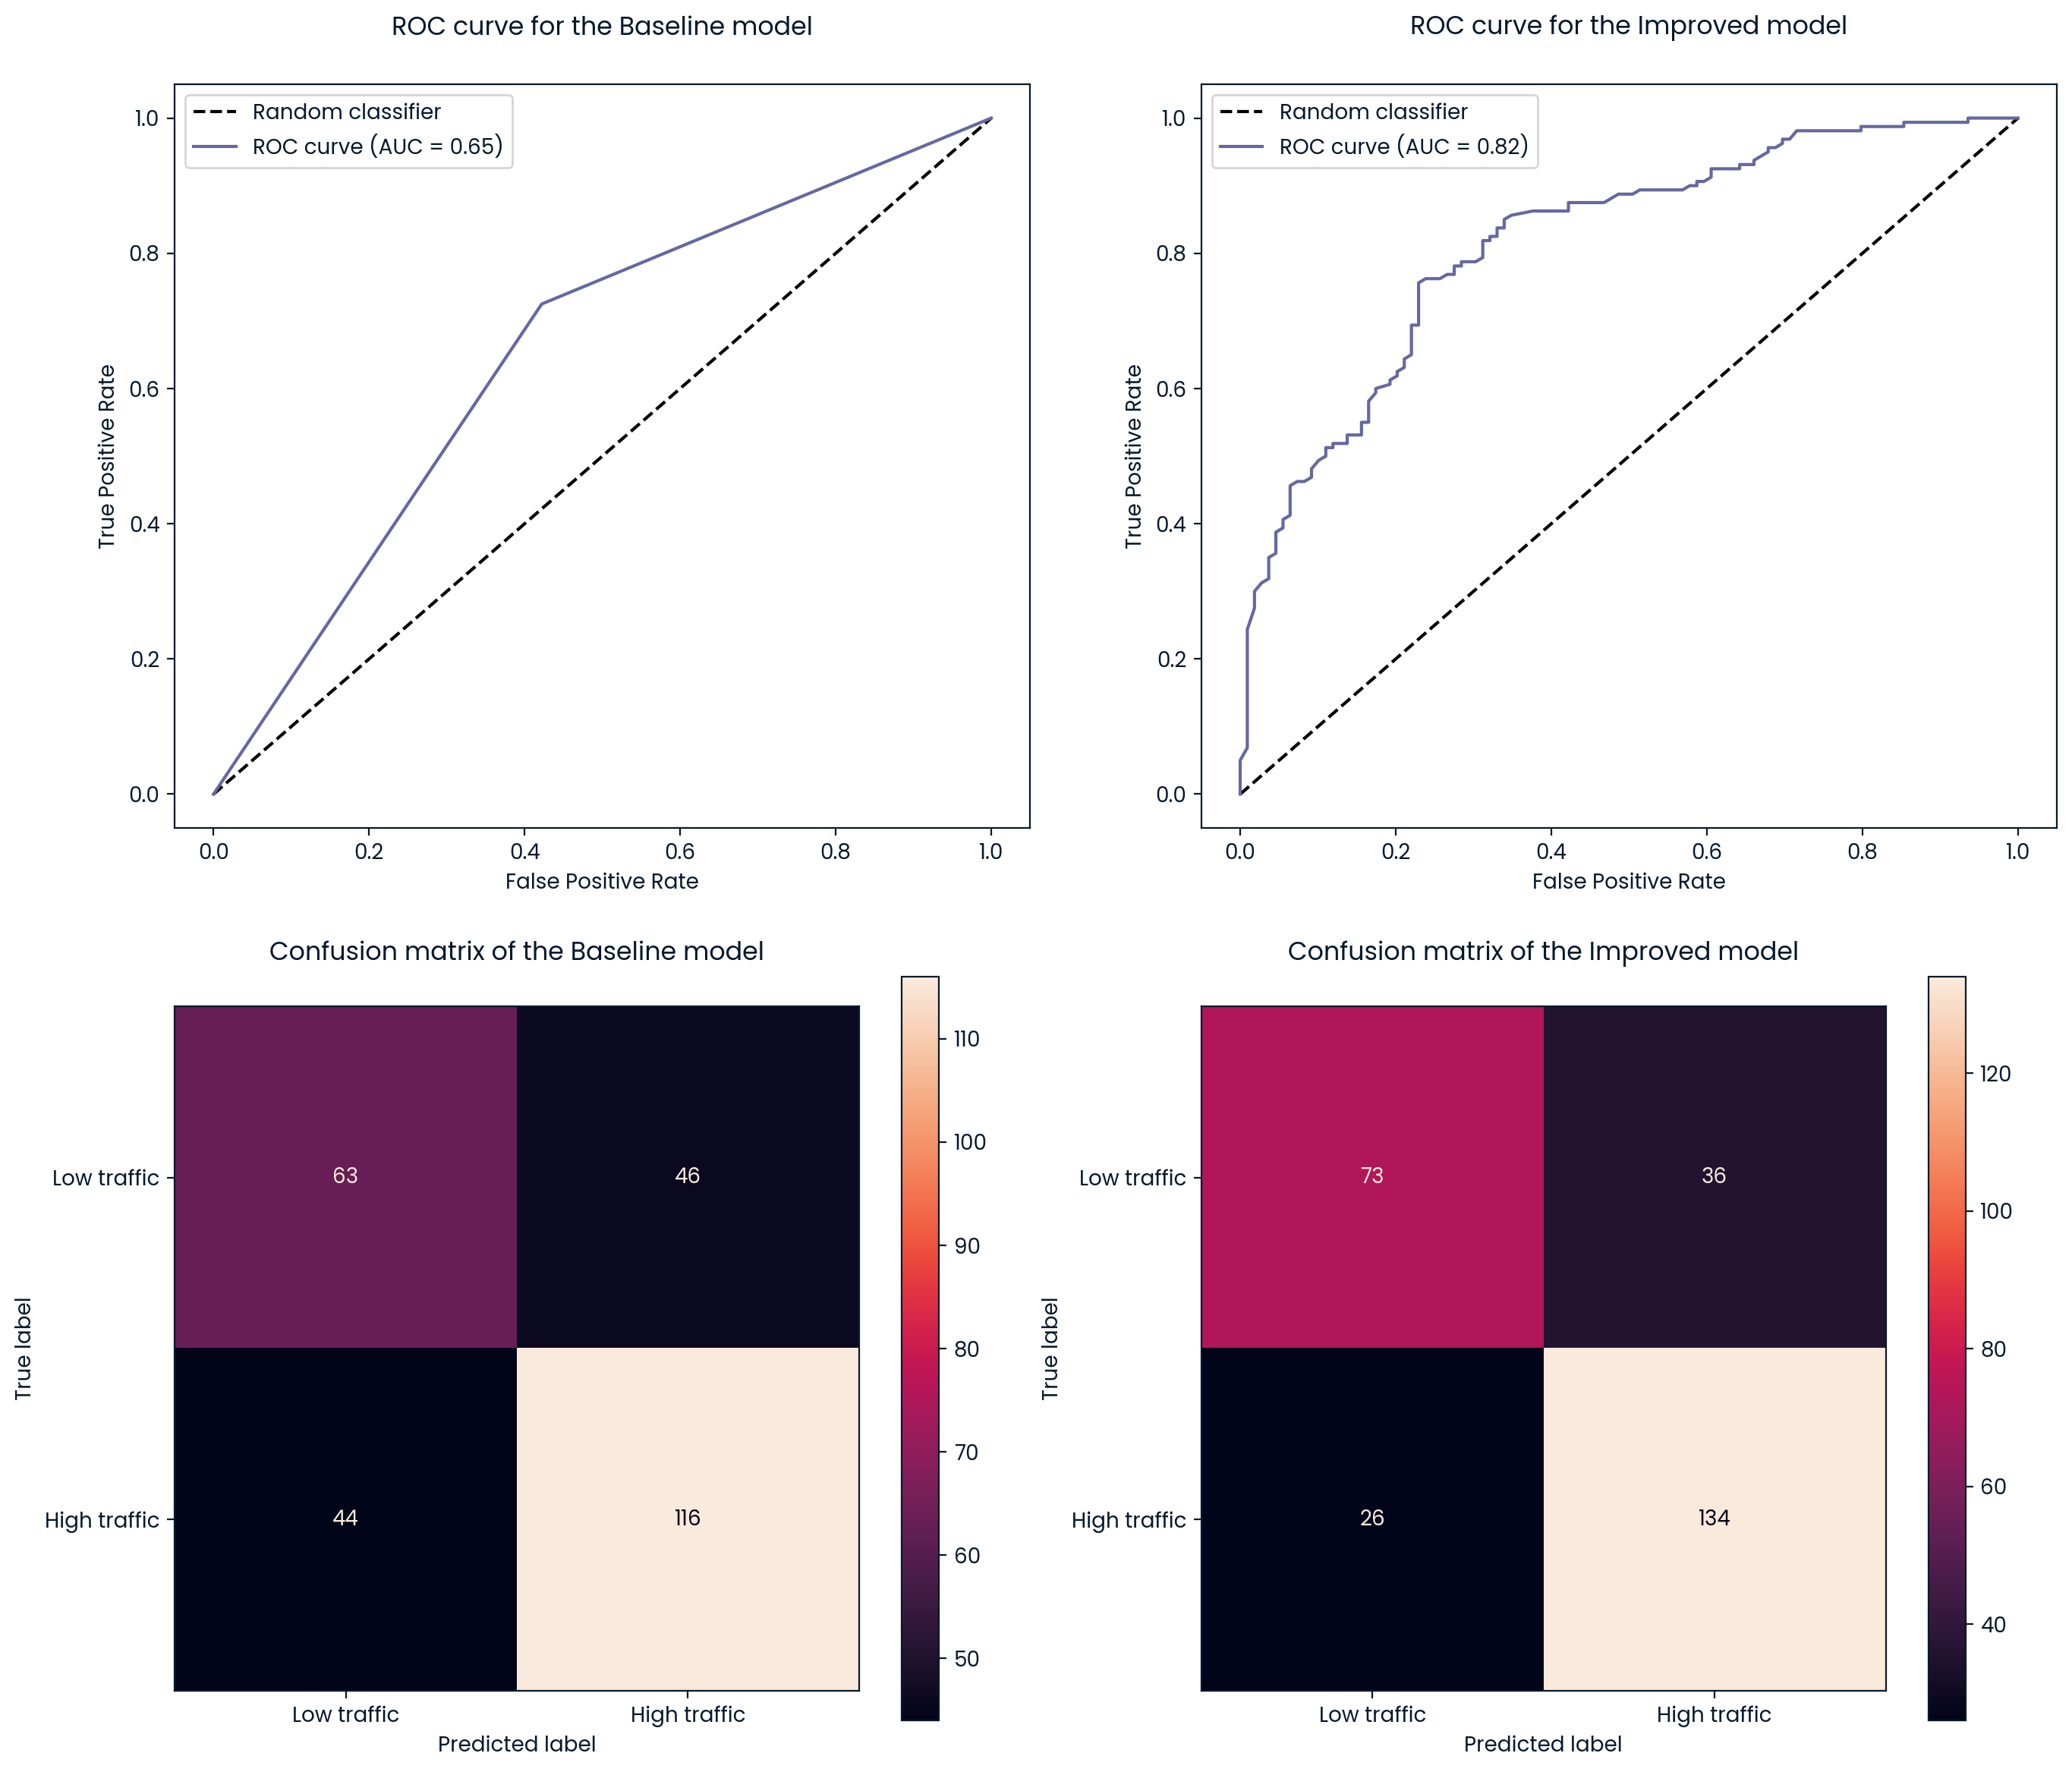

In [12]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score


#Drawing the ROC curve and the confusion matrix for both our models
models = {'Baseline model': dt, 'Improved model': best_bc}
fig, ax = plt.subplots(2, 2, figsize=(16, 14))  # Initializing two plots side by side

#Iterating through our models to plot each one side by side for comparison
for i, (name, model) in enumerate(models.items()):

    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Getting the numerical value for the ROC score
    roc_score = roc_auc_score(y_test, y_pred_proba)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    
    # Plotting the ROC curve on the upper part of the subplot
    ax[0, i].plot([0, 1], [0, 1], 'k--', label='Random classifier') 
    ax[0, i].plot(fpr, tpr, label=f'ROC curve (AUC = {roc_score:.2f})')
    ax[0, i].set_xlabel('False Positive Rate')
    ax[0, i].set_ylabel('True Positive Rate')
    ax[0, i].set_title(f'ROC curve for the {name}', y=1.05)
    ax[0, i].legend()
    
    #  Plotting the Confusion matrix on the bottom part of the subplot
    y_pred = model.predict(X_test)
    confmat= confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=['Low traffic', 'High traffic'])
    disp.plot(ax=ax[1, i], cmap=sns.color_palette("rocket", as_cmap=True))
    ax[1, i].set_title(f'Confusion matrix of the {name}', y=1.05)
    
    print(f'The sensitivity of the {name} is {recall_score(y_test, y_pred)*100:.2f}%, and the accuracy is {accuracy_score(y_test, y_pred)*100:.2f}%')

plt.show()

We can see a clear improvement of the air under the curve for the fine tuned model's ROC curve.
We can also see that with the tuned model, we manage to detect more true positive as well as true negative, while reducing the false categorizations.
Consequently, there is an improvement of 10% in the accuracy of our model, and we respect the required 80% detection of True positives asked by the client, as the recall also improved with our second model.  

In [13]:
percentage_high_traffic = len(clean_df[clean_df['high_traffic']=='High'])/clean_df.shape[0]*100
print(f"The percentage of high traffic is currently of {percentage_high_traffic:.2f}%")

The percentage of high traffic is currently of 59.78%


# Definition of a metric for the business to monitor

In this problem, since our client is trying to predict whether or not a recipe is going to generate a high traffic on their website, the target variable seems like the best choice as a metric. 
We could suggest for the client to monitor the **percentage of High traffic recorded on their website** based on the amount of recipes that have been published. 
After cleaning of the dataset, this metric is currently of **59.78%**.

# Final summary

To try and answer the client's need, we managed to find a model that suits the data in order to predict if a recipe is going to generate a high traffic on their website or not. 
Using the fine tuned Decision tree classifier model that I trained, the client can predict this. Furthermore, the recall of said model is of 84%, which is superior to the initally asked 80% that was asked by the client, whilst maintaining a good precision for that prediction compared to our baseline model. 

## Suggestions for the business

Using the model provided, I would recommand for the client to try and predict whether the new recipes that they come up with will generate a high traffic or not. They should then select as many of the new recipes predicted to induce a high traffic to publish, in order to generate as much high traffic as possible on the website. I would also advise avoiding to publish the ones that are predicted to be of low traffic, which seem to be the case for Beverages recipes for example. 
By monitoring the percentage of recipes that induce a high traffic over time, the client should then be able to tell wether or not they manage to increase their website's traffic using the model. 

According to the client, high traffic on the website also impacts positively the amount of subscriptions. So it could also be a good idea for the company to monitor said subsciptions to see whether or not the predictions contributed to their increase. 

The client should also consider giving us more data after having tried our model so we can retrain the model on new information to further improve their performance in the future. 